# Project 1. Game sales data analysis

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import re
import wikipediaapi
import math
from statistics import mean


In [243]:
#options

pd.set_option('display.max_rows', 50);
# set font
plt.rc("font", family = "Malgun Gothic");
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid');

option.
1. kaggle 에서 새로운 데이터파일을 가져와 하나로 합친다??
2. 데이터가 항상 풍성할 수는 없다. 제한적인 상황에서 최대한의 아웃풋을 뽑아내본다.

In [244]:
# load data
# df_vgame = pd.read_csv('vgames2.csv');
# df_vgame.head()

In [245]:
# Check missing values
# df_vgame.info()

Unnamed 를 index로 수정  
Year 항목에 결측치 다수, 타입 int로 수정  
Genre 항목 결측치 다수  
Publisher 항목 결측치 다수  
Sales 항목들 numeric 으로 수정  


In [246]:
# vgame_copy = df_vgame.copy();

In [247]:
# Drop Unnamed
# vgame_copy = vgame_copy.drop("Unnamed: 0",axis=1);

In [248]:
# vgame_copy.info()

In [249]:
# year_null = vgame_copy[vgame_copy.Year.isnull()];
# year_null.shape 

In [250]:
# wikipedia 크롤링 해 결측치 채우기

# import wiki_crawler
# import importlib
# importlib.reload(wiki_crawler)

In [251]:
# 모듈 초기화
# wc = wiki_crawler.WikiCrawler();
# 크롤링
# df_result = wc.fill_all(year_null);
# df_result.head()


In [252]:
# 크롤링 한 데이터 합치기

# result_copy = df_result.copy();
# result_copy
# vgame_copy['Year'] = vgame_copy['Year'].astype('str');
# for index in result_copy.index:
#     vgame_copy.loc[index,['Year','Genre','Publisher']] = result_copy.loc[index,['Year','Genre','Publisher']];

# vgame_copy.iloc[31]

In [253]:
# 새로운 파일 생성
# vgame_copy.to_csv('vgames_made_up.csv');

In [254]:
# 결측치 채운 데이터 셋 새로 로드
# df_vgame = pd.read_csv('vgames_0.csv');
# df_vgame.head()

In [255]:
# Drop Unnamed
# vgame_copy = df_vgame.drop("Unnamed: 0",axis=1);
# vgame_copy.head()

In [256]:
# 이외의 결측치는 제거
# vgame_copy = vgame_copy.dropna();
# vgame_copy.shape

In [257]:
# 이상치 탐색

# df_nulls = vgame_copy[vgame_copy.Year.isnull() | vgame_copy.Genre.isnull() |vgame_copy.Publisher.isnull()];
# index = vgame_copy[vgame_copy.Name.duplicated()].index
# vgame_copy.loc[index].sort_values('Name')

# vgame_copy.Year.value_counts()

In [258]:
# Remove .0
# astype int
# vgame_0 = vgame_copy.query("Year.str.contains(r'\d{4}')");
# vgame_0.Year = vgame_0.Year.str.replace(r"\.\d","").astype(int);
# vgame_0.info()



In [259]:
# Remove " game"
# vgame_0.Genre = vgame_0.Genre.str.replace(r" game","");

In [260]:
# merge all role playings
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)role).*","RPG");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rpg).*","RPG");

In [261]:
# merge all simulations
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)simul).*","Simulation");

In [262]:
# merge all shooters
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)shoot).*","Shooter");

In [263]:
# merge all strategies
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)strat).*","Strategy");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)tact).*","Strategy");

In [264]:
# merge all adventures
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)adven).*","Adventure");

In [265]:
# merge all platforms

# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)platform).*","Platform");

In [266]:
# merge all racings
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rac).*","Racing");

In [267]:
# merge all actions
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)action).*","Action");

In [268]:
# merge others
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rhythm).*","Rhythm");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)horror).*","Adventure");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)party).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)unknown).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)beat).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)music).*","Rhythm");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)stealth).*","Action");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)vehicul).*","Action");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)board).*","Strategy");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)manage).*","Simulation");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)various).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)tile).*","Puzzle");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)snow).*","Sports");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)hack).*","Role-Playing");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)break).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)fit).*","Sports");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)otome).*","Simulation");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)slot).*","Misc");

In [269]:
# print = vgame_0.Genre.value_counts();

In [270]:
# Save
# vgame_1 = vgame_0.copy();
# vgame_1.to_csv('vgames_1.csv');

In [271]:
# dataset load
# vgame_1 = pd.read_csv('vgames_1.csv');
# vgame_1.head()

In [272]:
# vgame_1 = vgame_1.drop("Unnamed: 0",axis=1);
# vgame_1.info()

In [273]:
# Unify units
# vgame_1.Other_Sales.value_counts()

In [274]:
# Modulise method that converts numbers
# unit convert method import

# import unit_converter as uc
# import importlib
# importlib.reload(unit_converter);


In [275]:
# convert all sales numbers
# def func(f):
#     return uc.convert_unit(f, base_unit='M',out_type=int);
# vgame_1.NA_Sales = vgame_1.NA_Sales.map(func);
# vgame_1.EU_Sales = vgame_1.EU_Sales.map(func);
# vgame_1.JP_Sales = vgame_1.JP_Sales.map(func);
# vgame_1.Other_Sales = vgame_1.Other_Sales.map(func);

In [276]:
# add total sales
# vgame_1['Total_Sales'] = vgame_1.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1);
# vgame_1.head()

In [277]:
# reset index
#vgame_1 = vgame_1.reset_index(drop=True);

In [278]:
# save
# vgame_2 = vgame_1.copy();
# vgame_2.to_csv('vgames_2.csv');

In [279]:
# dataset load
# vgame_2 = pd.read_csv('vgames_2.csv');
# vgame_2.head()

In [280]:
# vgame_2 = vgame_2.drop("Unnamed: 0",axis=1);

In [281]:
# clasify console, PC, mobile

# def classify_device(df):
#     hhc = ['DS','PSP','GBA','3DS','PSV','GB','WS','GG'];
#     df_copy = df.copy();
#     devices = [];

#     for index, x in enumerate(vgame_2.Platform):
#         if x in hhc:
#             devices.append('HHC');
#         elif x == 'PC':
#             devices.append('PC');
#         else:
#             devices.append('Console');
    
#     if df_copy.shape[0] == len(devices):            
#         df_copy['Device_Type'] = devices;
    
#     return df_copy;


# def classify_company(df):
#     nintendo = ['DS','Wii','GBA','GC','3DS','N64','SNES','WiiU','GB','NES'];
#     sony = ['PS2','PS3','PSP','PS','PSV','PS4'];
#     MS = ['X360','XB','XOne'];
#     sega = ['SAT','DC','GEN','SCD','GG'];
#     atari = ['2600'];
#     SNK = ['NG'];
#     bandai = ['WS'];
#     panasonic = ['3DO'];
#     NEC = ['TG16','PCFX'];
    
#     df_copy = df.copy();
#     company = [];

#     for index, x in enumerate(vgame_2.Platform):
#         if x in nintendo:
#             company.append('Nintendo');
#         elif x in sony:
#             company.append('Sony');
#         elif x in MS:
#             company.append('Microsoft');
#         elif x in sega:
#             company.append('SEGA');
#         elif x in atari:
#             company.append('Atari');
#         elif x in SNK:
#             company.append('SNK');
#         elif x in bandai:
#             company.append('Bandai');
#         elif x in panasonic:
#             company.append('Panasonic');
#         elif x in NEC:
#             company.append('NEC');
#         else:
#             company.append('PC');
    
#     if df_copy.shape[0] == len(company):
#         df_copy['Platform_Company'] = company;
        
#     return df_copy;


In [282]:
# Add device type and company
# vgame_2 = classify_device(vgame_2);
# vgame_2 = classify_company(vgame_2);
# vgame_2.head()

In [283]:
# reorder columns
# columns_order = ['Name','Year','Genre','Publisher','Platform','Platform_Company','Device_Type','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'];
# vgame_2 = vgame_2[columns_order];

In [284]:
# Save
# vgame_3 = vgame_2.copy();
# vgame_3.to_csv('vgames_3.csv');


In [285]:
# dataset load
# vgame_3 = pd.read_csv('vgames_3.csv',index_col=0);
# vgame_3.head()

In [286]:
# trim before 1980 and after 2017
# make up new data set
# vgame_3 = vgame_3[(vgame_3.Year >= 1980) & (vgame_3.Year < 2017)];


In [ ]:
# # 1987 adventrue 누구냐?
# temp = vgame_3[(vgame_3.Year == 1987) & (vgame_3.Genre == 'Adventure')];
# temp
# # 젤다였네...ㅋㅋㅋ

# df_copy = vgame_3.copy();
# zelda_idx = df_copy.query("Name.str.contains(r'(?i)zelda')").index;
# for i in zelda_idx:
#     df_copy.loc[i,'Genre'] = 'Adventure'; # 장르 Adventure로 수정

# df_copy.to_csv('vgames_4.csv');


In [412]:
vgame_4 = pd.read_csv('vgames_4.csv',index_col=0);
vgame_4.head()

,Name,Year,Genre,Publisher,Platform,Platform_Company,Device_Type,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,DS,Nintendo,HHC,40000,0,0,0,40000
1,The Munchables,2009,Action,Namco Bandai Games,Wii,Nintendo,Console,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,PSP,Sony,HHC,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,DS,Nintendo,HHC,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,PS3,Sony,Console,120000,90000,0,40000,250000


1. 지역에 따라선호하는 게임 장르가 다를까?

In [414]:
# 북미 판매량 확인

# 전체년도
na_genre = vgame_4[['Genre','NA_Sales']];

# na_genre_sum = na_genre.groupby('Genre').sum().sort_values('NA_Sales',ascending=False);
# na_genre_mean = na_genre.groupby('Genre').mean().sort_values('NA_Sales',ascending=False);
temp = na_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
temp.columns = col_li;

NA_mean = temp.loc[:,'NA_Sales_mean'].sort_values(axis=0,ascending=False);
NA_max = temp.loc[:,'NA_Sales_max'].sort_values(axis=0,ascending=False);
NA_releases = temp.loc[:,'NA_Sales_count'].sort_values(axis=0,ascending=False);


In [292]:
# 유럽 판매량 확인

# 전체년도
# eu_genre = vgame_4[['Genre','EU_Sales']];

# temp = eu_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# EU_mean = temp.loc[:,'EU_Sales_mean'].sort_values(axis=0,ascending=False);
# EU_max = temp.loc[:,'EU_Sales_max'].sort_values(axis=0,ascending=False);
# EU_releases = temp.loc[:,'EU_Sales_count'].sort_values(axis=0,ascending=False);


In [293]:
# 일본 판매량 확인

# 전체년도
# jp_genre = vgame_4[['Genre','JP_Sales']];

# temp = jp_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# JP_mean = temp.loc[:,'JP_Sales_mean'].sort_values(axis=0,ascending=False);
# JP_max = temp.loc[:,'JP_Sales_max'].sort_values(axis=0,ascending=False);
# JP_releases = temp.loc[:,'JP_Sales_count'].sort_values(axis=0,ascending=False);


In [294]:
# 기타지역 판매량 확인

# 전체년도
# other_genre = vgame_4[['Genre','Other_Sales']];

# temp = other_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# Other_mean = temp.loc[:,'Other_Sales_mean'].sort_values(axis=0,ascending=False);
# Other_max = temp.loc[:,'Other_Sales_max'].sort_values(axis=0,ascending=False);
# Other_releases = temp.loc[:,'Other_Sales_count'].sort_values(axis=0,ascending=False);

In [295]:
# 전체 판매량 확인

# 전체년도
# total_genre = vgame_4[['Genre','Total_Sales']];

# temp = total_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# Total_mean = temp.loc[:,'Total_Sales_mean'].sort_values(axis=0,ascending=False);
# Total_max = temp.loc[:,'Total_Sales_max'].sort_values(axis=0,ascending=False);
# Total_releases = temp.loc[:,'Total_Sales_count'].sort_values(axis=0,ascending=False);

In [415]:
def set_colours(df):
    colours = [];
    for x in df.index:
        if   x == 'Action':     colours.append('tab:blue');
        elif x == 'Sports':     colours.append('tab:orange');
        elif x == 'Misc':       colours.append('tab:gray');
        elif x == 'RPG':        colours.append('tab:green');
        elif x == 'Adventure':  colours.append('tab:purple');
        elif x == 'Shooter':    colours.append('gold');
        elif x == 'Racing':     colours.append('tab:pink');
        elif x == 'Platform':   colours.append('tab:red');
        elif x == 'Simulation': colours.append('tab:olive');
        elif x == 'Fighting':   colours.append('tab:cyan');
        elif x == 'Strategy':   colours.append('slateblue');
        elif x == 'Puzzle':     colours.append('tab:brown'); 
        else : colours.append('white'); 
    return colours;

colour_map = { 
        'Action':     'tab:blue',
        'Sports':     'tab:orange',
        'Misc':       'tab:gray',
        'RPG':        'tab:green',
        'Adventure':  'tab:purple',
        'Shooter':    'gold',
        'Racing':     'tab:pink',
        'Platform':   'tab:red',
        'Simulation': 'tab:olive',
        'Fighting':   'tab:cyan',
        'Strategy':   'slateblue',
        'Puzzle':     'tab:brown'
        };   

'tab:blue'

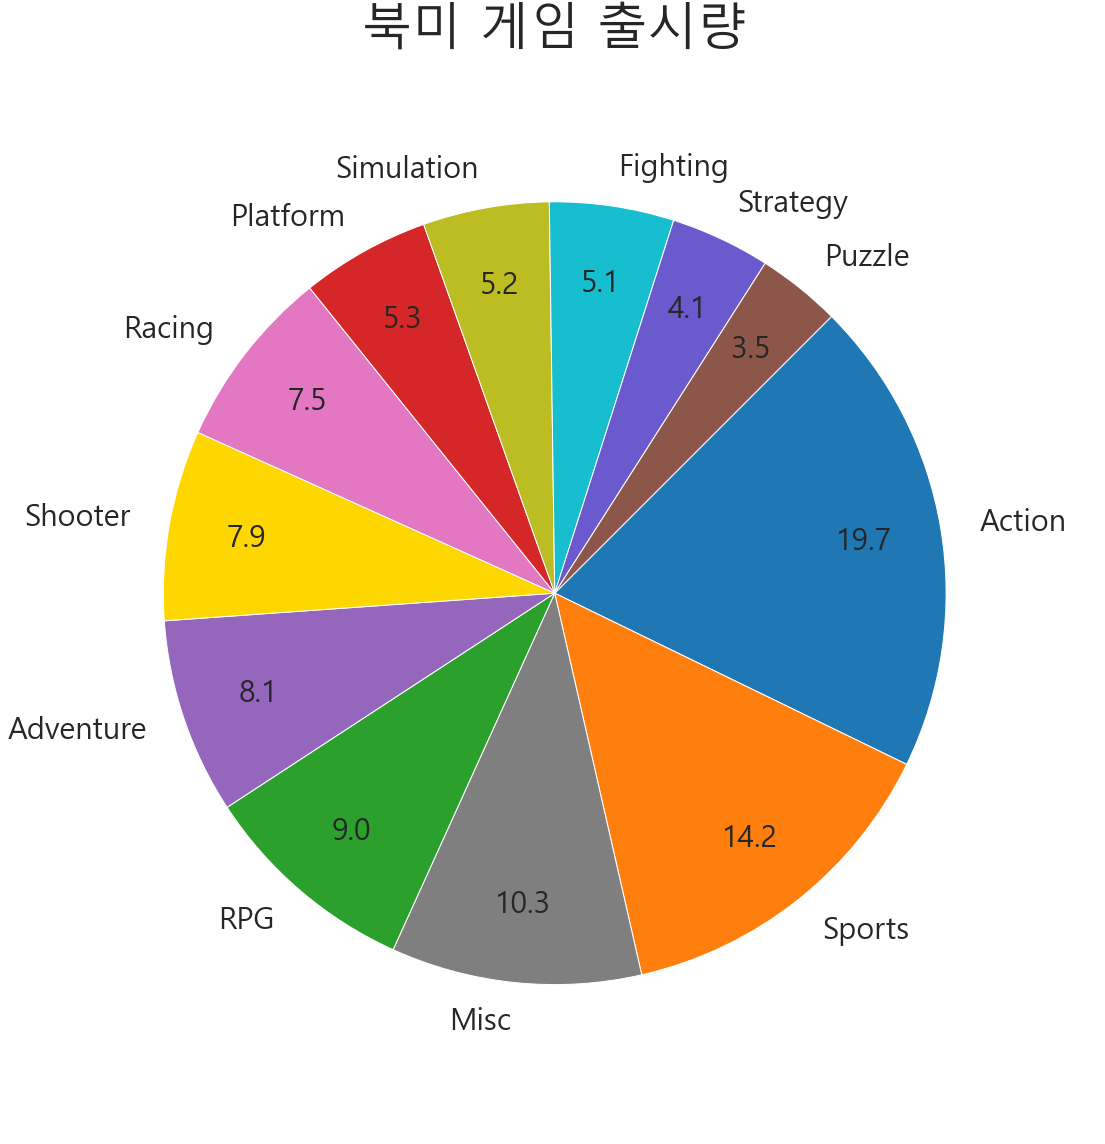

In [416]:
# NA Releases

# plt.style.use('fivethirtyeight');
# plt.style.use('greyscales');


#create pie chart
# sns.color_palette('colorblind');
# colors = sns.color_palette("tab10");
# colors = sns.color_palette("rocket_r");
# colors = sns.color_palette("yellow");
# colors = ['silver', 'gold', 'whitesmoke', 'lightgray'];
# colors = [];

exp = [];
colors = set_colours(NA_releases);

# for i,x in enumerate(NA_releases,1):
    # exp.append((count.shape[0]-i)*0.005);

    

    # PacMan    
    # if 1 <= i <= 1:
    #     colors.append('black');
    #     exp.append(1.2);
    # else : 
    #     colors.append('gold');
    #     exp.append(0);
        
    # exp.append((count.shape[0]-i)*-0.05);
    # exp.append(i*0.08);
    # exp.append((i%2)*-1.9);
    # exp.append(0);

plt.figure(figsize=(20,20));
# plt.title('NA game releases',fontdict={'fontsize' : 50});
plt.title('북미 게임 출시량',fontdict={'fontsize' : 50});

plt.pie(x=NA_releases.values,
        labels=NA_releases.index,
        autopct='%.1f',
        textprops={'fontsize': 30},
        labeldistance=1.1,
        center=(0,0),
        radius=0.9,
        startangle=45,
        counterclock=False,
        pctdistance=0.8,
        #explode=exp,
        #colors=colors
        colors = NA_releases.index.map(colour_map)
        );

# plt.savefig('myfigure.png', dpi=300);
plt.show()


In [298]:
# gn_loc = vgame_4[['Genre','NA_Sales']];
# temp = gn_loc.groupby(['Genre']).agg(['mean', 'max', 'count']);
# print(temp.columns);
# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# print(col_li);
# temp.columns = ['mean','max','count'];
# temp.head()

MultiIndex([('NA_Sales',  'mean'),
            ('NA_Sales',   'max'),
            ('NA_Sales', 'count')],
           )
['NA_Sales_mean', 'NA_Sales_max', 'NA_Sales_count']


,mean,max,count
Genre,,,
Action,265075.686129,9630000,3237
Adventure,85789.068514,6160000,1299
Fighting,264152.742243,6750000,838
Misc,237719.193720,14970000,1688
Platform,511931.033333,29080000,870


In [417]:
def create_barplot_by_genre(data,x,order):
    
    # 전체년도
    gn_loc = data[['Genre',x]];

    group = gn_loc.groupby(['Genre']).agg(['mean', 'max', 'count','median']);
    group.columns = ['Mean','Max','Count','Median'];

    sr_temp = None;
    if order == 'mean':
        sr_temp = group.loc[:,'Mean'].sort_values(axis=0,ascending=False);
    elif order == 'max':
        sr_temp = group.loc[:,'Max'].sort_values(axis=0,ascending=False);
    elif order == 'count':
        sr_temp = group.loc[:,'Count'].sort_values(axis=0,ascending=False);
    elif order == 'median':
        sr_temp = group.loc[:,'Median'].sort_values(axis=0,ascending=False);
    
    df_temp = pd.DataFrame(sr_temp);

    plt.close('all');
    plt.figure(figsize=(20,10));

    # set color
    colours = sr_temp.index.map(colour_map);

    #create barplot chart
    sns.barplot(data=data,
                y='Genre',
                x=x,
                estimator=mean,
                palette=colours, 
                order=df_temp.index,
                ci=0,
                );

    # plt.title('북미지역 장르별 평균 판매량',fontdict={'fontsize' : 50});
    plt.title(str(x + '_' + order),fontdict={'fontsize' : 50});

    # set fontsize
    # sns.set(font_scale = 2);
    plt.rc('xtick', labelsize=20); 
    plt.rc('ytick', labelsize=20);
    plt.tick_params(labelleft=False, left=False);

    # set xtick
    xlim = sr_temp.max();
    headroom = xlim * 0.2;
    plt.xlim(0,xlim + headroom);

    # put comma
    current_values = plt.gca().get_xticks();
    plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);

    # annotation
    y_offset = 0.15;
    x_offset = -70000;
    for i ,values in enumerate(zip(sr_temp.items())):
        plt.text(x=values[0][1] + 1000, y=i + y_offset,s=values[0][0]);
        # plt.text(x=values[0][1] + x_offset, y=i + y_offset,s=int(values[0][1]));

    # plt.savefig('myfigure.png', dpi=300);    
    plt.show()

C:\Users\TESB\AppData\Local\Temp\ipykernel_13044\3902828122.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


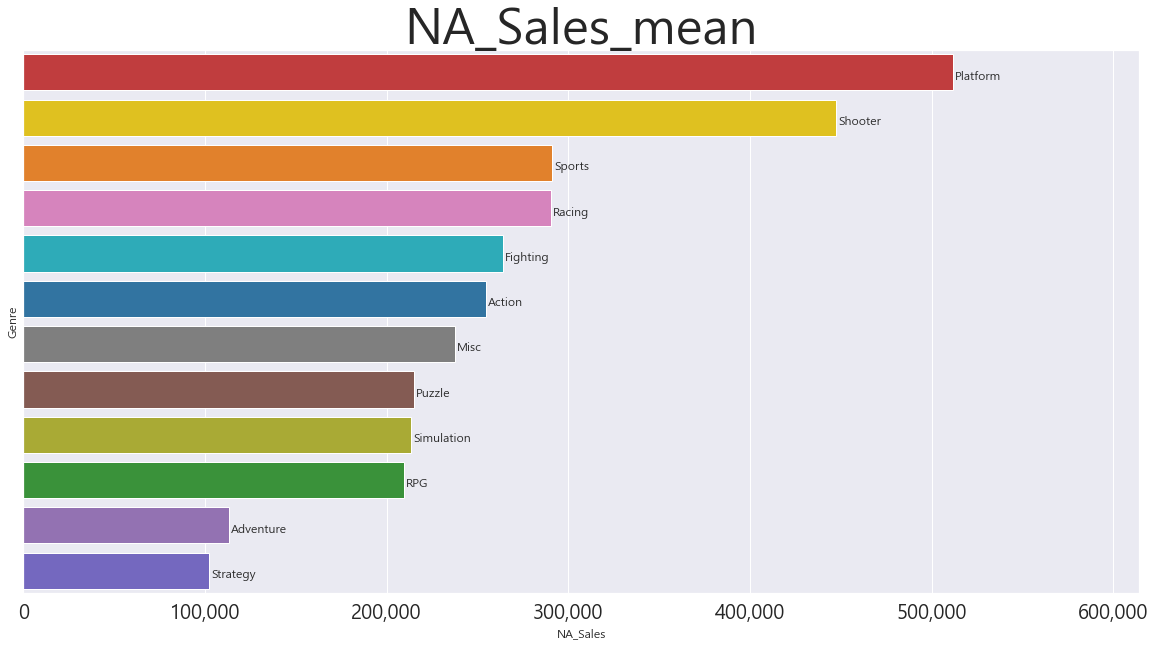

In [419]:
# NA Sales mean
create_barplot_by_genre(vgame_4,x='NA_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_13044\3902828122.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


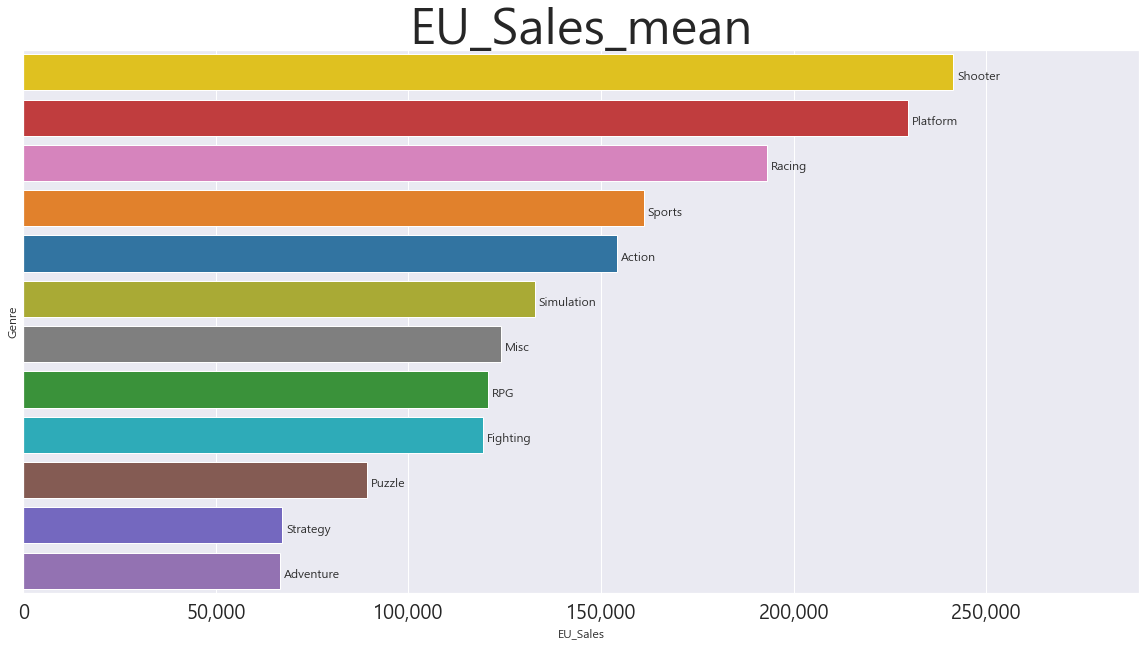

In [420]:
# EU Sales mean
create_barplot_by_genre(vgame_4,x='EU_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_13044\3902828122.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


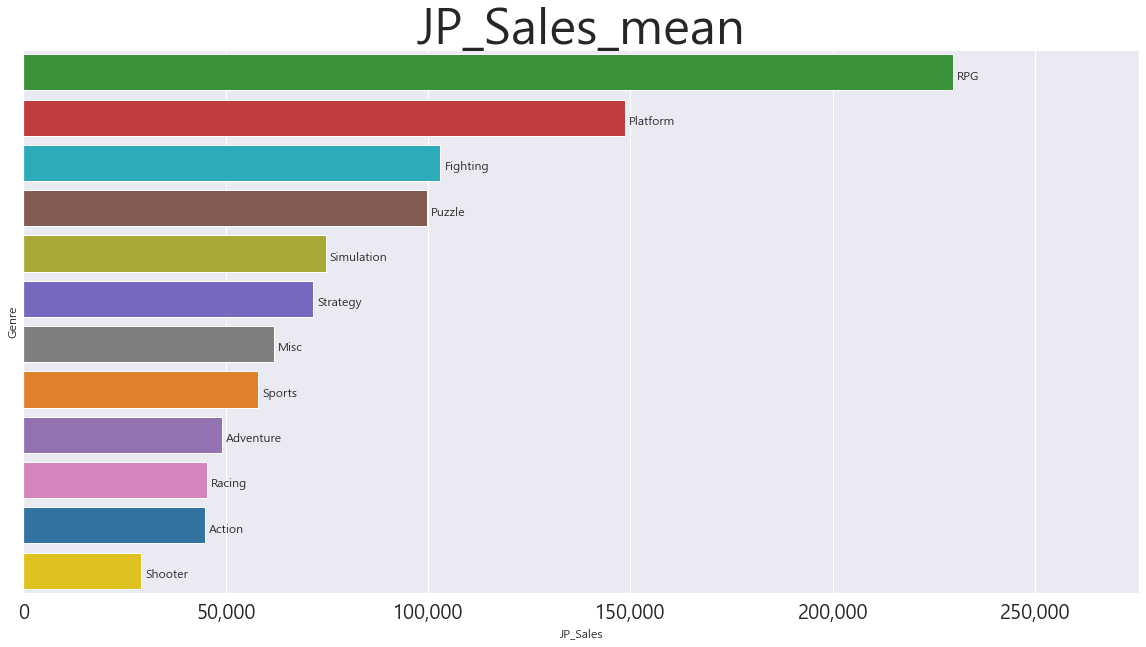

In [421]:
# JP Sales mean
create_barplot_by_genre(vgame_4,x='JP_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_13044\3902828122.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


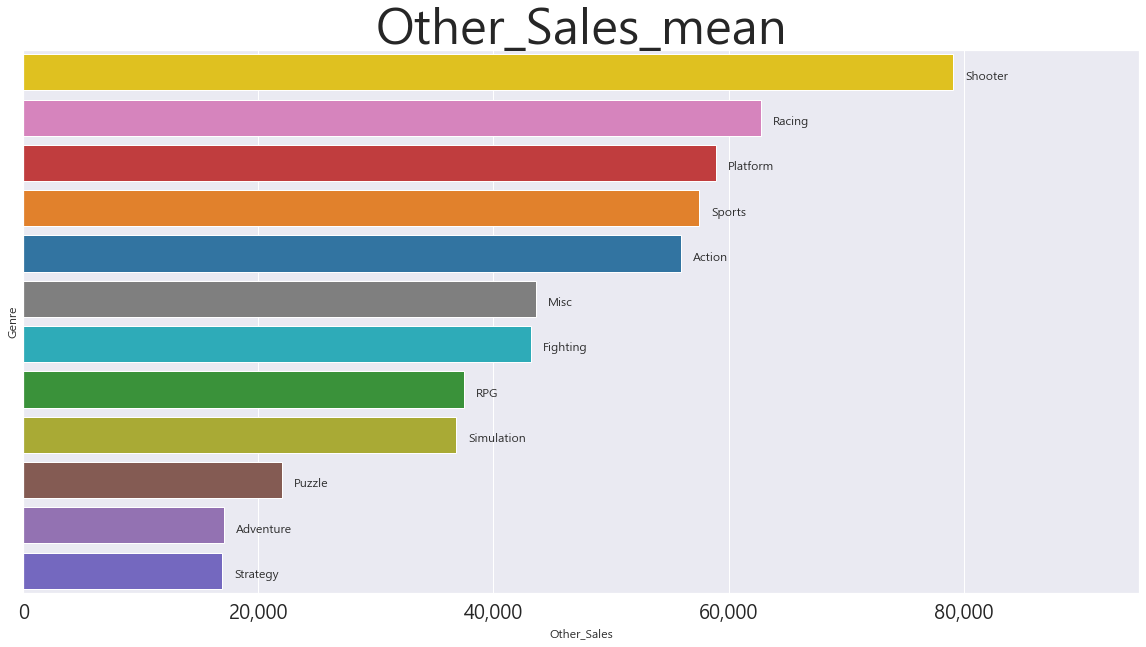

In [422]:
# Other Sales mean
create_barplot_by_genre(vgame_4,x='Other_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_13044\3902828122.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


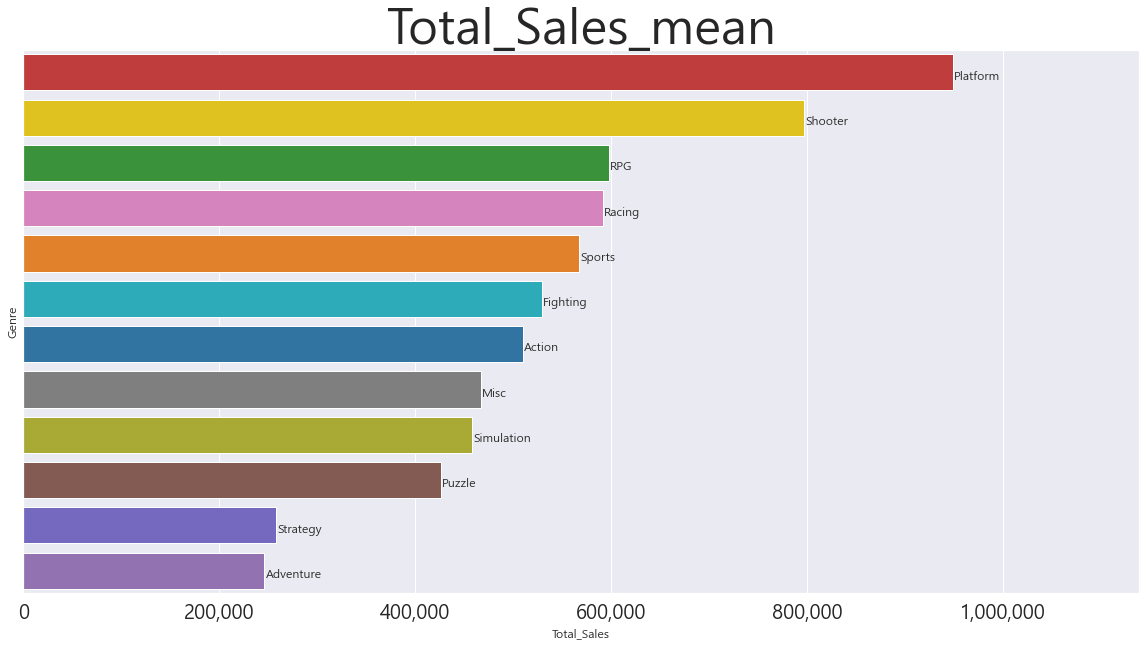

In [423]:
# Total Sales mean
create_barplot_by_genre(vgame_4,x='Total_Sales',order='mean');

In [424]:
gn_total = vgame_4[['Genre','Year','Total_Sales']];

In [425]:

pivot = pd.DataFrame.pivot_table(gn_total,index='Genre',columns='Year',values='Total_Sales', aggfunc = 'mean');
pivot_T = pivot;
print(pivot.head());

#=============================================================================
# # 빈도를 비율로 변환 (문항별)
# df_freq = df_freq.div(df_freq.sum(axis=1), axis=0)*100
sales_ratio_T = np.round(pivot_T.div(pivot.sum(axis=1), axis=0) * 100, 2);
sales_ratio = (np.round(pivot.div(pivot.sum(axis=0), axis=1) * 100, 2)).T;
sales_ratio.head(20)


# # columns 순서 정렬 (응답 1,2,3,4,5 순으로)
# df_freq = df_freq.reindex(sorted(df_freq.columns), axis=1)
# df_freq

Year           1980          1981          1982          1983       1984  \
Genre                                                                      
Action     340000.0  5.916000e+05  3.611111e+05  4.085714e+05  1850000.0   
Adventure       NaN           NaN           NaN  4.000000e+05    30000.0   
Fighting   770000.0           NaN  4.700000e+05           NaN        NaN   
Misc       675000.0           NaN  8.700000e+05  2.140000e+06  1450000.0   
Platform        NaN  2.306667e+06  1.006000e+06  1.386000e+06   690000.0   

Year             1985       1986       1987       1988          1989  ...  \
Genre                                                                 ...   
Action      1760000.0  1448000.0   555000.0   870000.0  1.606667e+06  ...   
Adventure         NaN  6500000.0  4380000.0        NaN           NaN  ...   
Fighting    1050000.0        NaN  2709999.5        NaN           NaN  ...   
Misc              NaN        NaN        NaN   170000.0  1.280000e+06  ...   
Platf

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,5.52,NaN,12.50,10.96,NaN,NaN,NaN,5.19,57.39,NaN,8.44,NaN
1981,9.63,NaN,NaN,NaN,37.57,18.32,NaN,7.82,16.32,7.17,3.18,NaN
1982,4.44,NaN,5.78,10.70,12.37,41.16,NaN,9.65,9.37,NaN,6.52,NaN
1983,4.64,4.54,NaN,24.31,15.74,8.86,NaN,NaN,5.57,NaN,36.34,NaN
1984,9.02,0.15,NaN,7.07,3.37,5.11,NaN,9.67,50.56,NaN,15.05,NaN
1985,10.11,NaN,6.03,NaN,62.01,4.61,NaN,NaN,5.75,0.23,11.26,NaN
1986,8.55,38.40,NaN,NaN,9.85,NaN,14.89,11.58,5.74,NaN,10.99,NaN
1987,4.90,38.63,23.90,NaN,7.67,NaN,13.67,NaN,3.04,NaN,8.18,NaN
1988,4.33,NaN,NaN,0.85,34.52,27.79,9.76,10.66,2.54,0.15,8.96,0.45


37


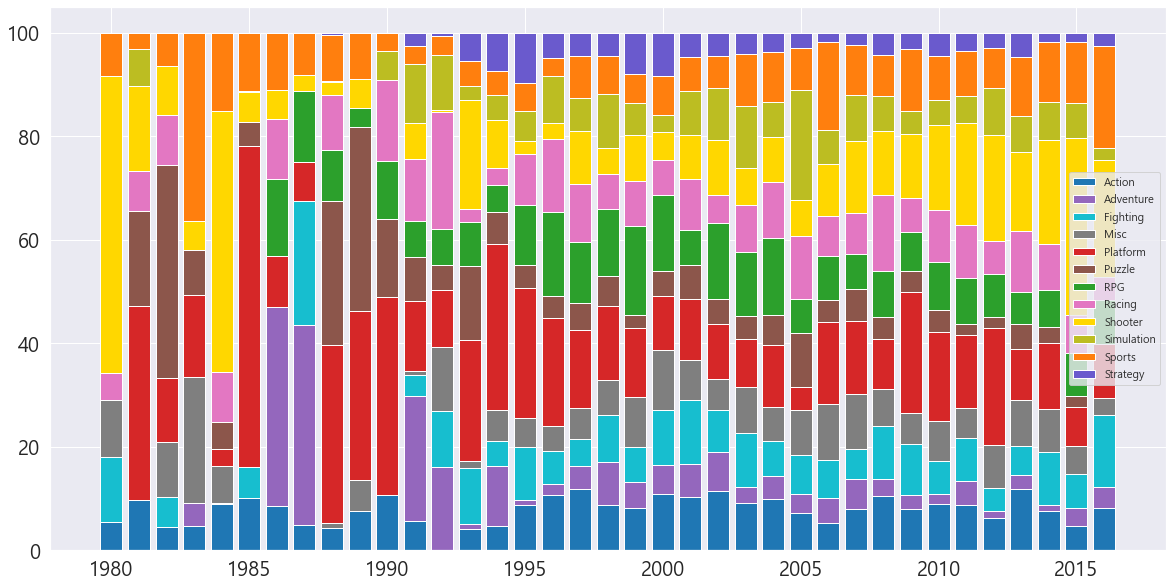

In [487]:
# sales_ratio.plot(kind="bar", stacked=True, colormap='RdBu')
colours = sales_ratio.columns.map(colour_map);
# print(colours);
plt.close('all');
plt.figure(figsize=(20,10));
# fig, ax = plt.subplots();
# fig.set(figsize=(20,7));

# print(sales_ratio['Action'].index.array);
test = np.zeros(4);
bottoms = np.zeros(len(sales_ratio.index));
print(len(bottoms));
for i, col in enumerate(sales_ratio.columns):

    plt.bar(
    x=sales_ratio.index,
    height=sales_ratio[col],
    color=colour_map[col],
    bottom=bottoms,
    label=col
    );   
    
    bottoms += np.nan_to_num(sales_ratio[col].values);
 
plt.legend();
# ax.bar(
#     x=sales_ratio.index,
#     #height=range(len(sales_ratio.index)),
#     height=sales_ratio.Action,
#     color='C0'
#     );

# ax.bar(
#     x=sales_ratio.index,
#     height=sales_ratio.Adventure,
#     color='C1',
#     bottom=sales_ratio.Action,
#     );
# ax.bar(
#     x=[1,2],
#     height=[3,4],
#     color='C1',
#     bottom=[3,4]
#     );
# plt.bar(x=sales_ratio.columns,
#         height=sales_ratio.index,
        
#         );
# for i in sales_ratio.index:
#     print(sales_ratio.Action[i]);
# sales_ratio.plot.bar(stacked=True);

In [178]:


##======================================================
# gn_total.head(10)

group = gn_total.groupby(['Year', 'Genre']).sum();
group = group.reset_index();
sum = group.groupby('Year').sum();
sum = sum.reset_index();
list_num = [];

for i, row in enumerate(group.values):
    ratio = np.round(row[2] / (sum[sum.Year == row[0]].Total_Sales.iat[0]),4);
    list_num.append(ratio);

print(group.shape);
print(len(list_num));
if group.shape[0] == len(list_num):
    group['Ratio'] = list_num;

group = group[['Year','Genre','Ratio']];
group[group.Year == 2000]


(391, 3)
391


,Year,Genre,Ratio
188,2000,Action,0.1677
189,2000,Adventure,0.0146
190,2000,Fighting,0.1003
191,2000,Misc,0.0769
192,2000,Platform,0.0790
193,2000,Puzzle,0.0190
194,2000,RPG,0.1453
195,2000,Racing,0.1008
196,2000,Shooter,0.0337
197,2000,Simulation,0.0167


In [ ]:
melt = gn_total.melt(id_vars=['Year','Genre']);

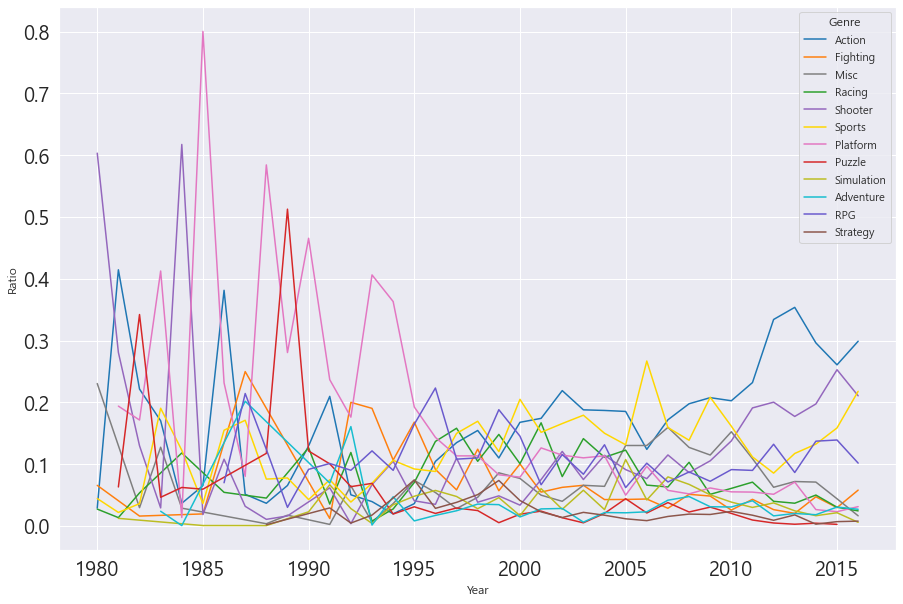

In [153]:
plt.close('all');
plt.figure(figsize=(15,10));
sns.lineplot(
    data=group,
    x='Year',
    y='Ratio',
    #y=group.values,
    hue='Genre',
    palette=colors
);

<AxesSubplot:xlabel='carat', ylabel='Density'>

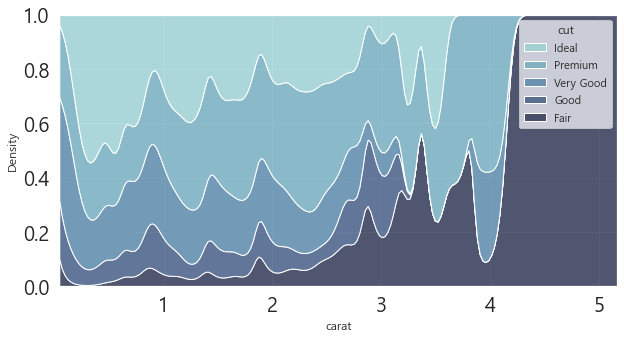

In [307]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data=diamonds,
    x="carat", 
    hue="cut",
    multiple="fill", 
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
    ax=ax
)

In [308]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
